# Danish Politicians - Explainer Notebook

# Table of content
#### [1. Motivation](#cell1)
- [1.1 Why politics](#cell1)
- [1.2 The datasets](#cell2)
- [1.3 Our vision](#cell3)

#### [2. Basic stats](#cell4)
- [2.1 Preprocessing](#cell4)
    - [2.1.1 Twitter data](#cell4)
    - [2.1.2 Parliament data](#cell5)
- [2.2 Data exploration](#cell6)
    - [2.2.1 Twitter data](#cell6)
    - [2.2.2 Parliament data](#cell7)

#### [3. Tools, theory and analysis](#cell8)
- [3.1 Sentiment analysis](#cell9)
    - [3.1.1 Calculation of sentiment](#cell9)
    - [3.1.2 Outcome](#cell9.1)
- [3.2 TF-IDF analysis](#cell10)
    - [3.2.1 Calculation of TF-IDF](#cell10)
    - [3.2.2 Outcome](#cell10.1)
- [3.3 Network analysis](#cell12)
    - [3.3.1 Introduction to Retweet network](#cell12)
    - [3.3.2 Introduction to Parliament network](#cell12.1)
    - [3.3.3 Basic stats and degree](#cell12.2)
        - [Retweet network](#cell12.2)
        - [Parliament network](#cell12.3)
    - [3.3.4 Centralities](#cell12.4)
        - [Retweet network](#cell12.4)
        - [Parliament network](#cell12.5)
    - [3.3.5 Community detection](#cell12.6)
        - [Retweet network](#cell12.6)
        - [Parliament network](#cell12.7)

#### [4. Discussion](#cell13)

<a id="cell1"></a>

# 1. Motivation

## Why politics

Politics are boring you may think, and well it can be.. Expecially for DTU students who are out in Lyngby, very far away from the Danish parliament at Christiansborg. We decided that politics can be fun as well if you work with it from a data scientist's perspective. 

We wanted to work with tweets because we think that people are very direct and 'real' in few words on Twitter, which establish a good foundation for (hopefully) interesting sentiment analysis. Our brainstorm took us all the way from Pokemon Go to WikiLeaks, but with three votes against zero we went with politics. 

The interest came when we discovered that all meetings in the Danish Parliament have been transcripted and uploaded to their webpage (http://www.ft.dk). Luckily the meetings after 2010 had been ordered neatly on the webpage ready for scraping (compared to the pdf files that was uploadet before 2010), so scraping we did and suddenly we had a really nice dataset.

<a id="cell2"></a>

## The datasets

We are working with two datasets in this project. One of the datasets includes tweets imported using Twitter's API and the python Tweepy package, saved as json files. The size of the dataset is 780 MB. The other dataset includes speech from the meetings in the Danish Parliament saved as a csv file (186 MB). The website (http://www.ft.dk/Dokumenter/Referater_efter_modedato.aspx#dok) have been scraped using beatiful soup to get all the text pieces from the meetings.

<a id="cell3"></a>

## Our vision

Politics nowadays can be cumbersome to understand for none-politicians as the majority of us are. We hope that users of our webpage will have a fun experience while understanding some of the things that happen in politics. Overall our vision is that the webpage will help the everyday man or women to keep an eye on what happens at Christiansborg; which topics get discussed and which topics make their appearance all the way to the politicians' Twitter profiles. Hopefully the users will get a sense of the sentiment on Twitter compared to the sentiment in the parliament meetings. They might also get an insight in the retweet patterns of the politicians.

*Examples of use cases on the webpage:*

Mr. Madsen want to know what mainly have been discussed over the last few years in the parliament
 - *Taking a look at the timeline might give him a good idea*
 
Mr. Frederiksen thinks that some politicians are using rough language on television and social media these days. He wants to know if the same tone is used in the parliament meetings, but does not want to watch videos or read minutes from the meetings.
 - *Looking at the sentiment graphs he might be able to discover some facts about the sentiment in the parliament*
 
Miss Lassen loves Twitter and she often retweet her friends' tweets. She would like to know if the politicians do the same.
 - *Playing around with the retweet network on the webpage can tell her the answer*

<a id="cell4"></a>

# 2. Basic stats

This section includes information about cleaning and preprocessing of the data as well as a short section exploring the basic stats of the datasets. Both sections below have been divided into Twitter data and Parliament data.

## 2.1 Preprocessing

### 2.1.1 Twitter data
Overall the preprocessing consisted of getting twitter names of the politicians in the parliament (www.twitterpolitikere.dk), retrieving as many of their tweets as possible and saving/processing the data in a useful way for data analysis.

We used a method (inspired by this code: https://gist.github.com/yanofsky/5436496) to collect as many tweets per politician with a twitter profile as possible (max is around 3200). The twitter API was used through a python package called Tweepy. For each politician we saved all their tweets to a json file to ensure consistency. For the data analysis we imported the tweets and ordered them in a pandas dataframe. 

Mainly we used two dataframes, one incluing information about the politicians and anthor including all the tweets of the politicians. The dataframe including all the tweets below have been cleaned for retweets, and includes only tweets actually written by the twitter profile (for sentiment analysis).
A sample of the dataframe can be seen below. 

In [81]:
import pandas as pd
pol = pd.DataFrame.from_csv('Politicians.csv')
pol.sample(n=10)

,Name,TwitterName,NameShort,Party,Followers,Friends,Tweets
Karen Klint,Karen Klint,@KarenJKlint,KarenJKlint,Socialdemokraterne,257,32,2
Sofie Carsten Nielsen,Sofie Carsten Nielsen,@sofiecn,sofiecn,Radikale,19989,2373,8849
Lars Aslan Rasmussen,Lars Aslan Rasmussen,@AslanLars,AslanLars,Socialdemokraterne,90,0,1
Thomas Jensen,Thomas Jensen,@MFThomasJensen,MFThomasJensen,Socialdemokraterne,3141,1977,1019
Pernille Rosenkrantz-Theil,Pernille Rosenkrantz-Theil,@RosenkrantzT,RosenkrantzT,Socialdemokraterne,16068,402,1214
Lotte Rod,Lotte Rod,@lotterod,LotteRod,Radikale,8401,6173,4909
Rune Lund,Rune Lund,@RuneLundEL,RuneLundEL,Enhedslisten,676,425,502
Mattias Tesfaye,Mattias Tesfaye,@mattiastesfaye,mattiastesfaye,Socialdemokraterne,13763,719,5792
Julie Skovsby,Julie Skovsby,@JulieSkovsby,JulieSkovsby,Socialdemokraterne,1273,1345,334
Kim Christiansen,Kim Christiansen,@DfkichKim,DfkichKim,Dansk Folkeparti,179,25,7


In [80]:
tweets = pd.DataFrame.from_csv(open('twitter_text.csv', 'rU'))
tweets.sample(n=10)

,Hashtags,Name,Text,HtCounts,Sentiment
Datetime,,,,,
2016-09-11 06:34:11,"[dkpol, integration]",rasmus nordqvist,"Samarbejde er nemlig godt, også når det handle...",2,4
2015-05-28 20:49:30,NaN,Pernille Skipper,@mikkelottesen hi. Det var sjovt sagt:),0,3
2016-03-14 09:29:25,NaN,Morten Bødskov,"Overskud, @Ingemann84 😎@BrondbyIF",0,0
2016-07-16 07:37:42,"[TurkeyCoup, dkpol]",Yildiz Akdogan,"Det bliver ikke ""normale"" tilstande i Tyrkiet ...",2,0
2014-07-07 14:01:41,[tourtv2],Jesper Petersen,Har i løb genopført søndagens finale mindst 20...,1,0
2016-11-04 07:01:18,NaN,Benny Engelbrecht,@BinderKasper måske mig der er for bekymret - ...,0,0
2015-03-10 13:17:35,NaN,Astrid Krag,Det er da vidst ikke rigtigt @HansJern - er de...,0,0
2015-10-04 19:08:27,NaN,Lotte Rod,@eDidaktik økonomisk frisættelse er et mål til...,0,2
2015-12-24 16:38:16,NaN,Nikolaj Villumsen,Glædelig jul til alle :) https://t.co/AfI3nsIRG1,0,3


<a id="cell5"></a>

### 2.1.2 Parliament data

When we started looking into finding data on the things said in the parliament meetings we were happy to find that all the data supposedly were available at http://oda.ft.dk/. To our great dissapointment this website only contained questions asked in the meetings but it did not contain any answers to those questions. We contacted http://oda.ft.dk/ to see if these data were somehow available but without luck. We knew that all of the text were available in raw text format on http://www.ft.dk/Dokumenter/Referater_efter_modedato.aspx but in a much less accessible format. 

#### Step 1
To access each document we first needed to find a link to each document. So the first thing we did was to use beautiful soup on http://www.ft.dk/Dokumenter/Referater_efter_modedato.aspx and extract all the links to meetings from 2011 to 2016. 
Code to extract the links:

In [ ]:
from bs4 import BeautifulSoup
import urllib2

baseurl = "http://www.ft.dk/"
init = "/dokumenter/referater_efter_modedato.aspx?session=&meetingNumber=&startDate=20101002&endDate=20181102&"+
        "sortColumn=&sortOrder=&startRecord=1&numberOfRecords=10000000&totalNumberOfRecords="
contentURLFolk = urllib2.urlopen(baseurl+init)
contentFolk = (contentURLFolk).read()

#Read website into beautiful soup
soup = BeautifulSoup(contentFolk, 'html.parser')

#List of all links
links = []
for tr in soup.find_all('tr'):
    liste = str(tr.get('onclick')).split('\'')
    if(liste[0]!='None'):
        links.append(baseurl+liste[1])

#### Step 2
We now had all of the links available in a nice csv format, it turned out that there have been 662 meetings since 2011. We looked into the structure of the HTML code on the meeting documents and found some key class name that made it possible for us to identify speakers, timestamp for each section and what was actually beeing said in that section. A section is one politican talking so each meeting might contain many sections.
Code do extract the sections: 

In [ ]:
import re
import pprint
import numpy as np
import urllib2
from bs4 import BeautifulSoup

# Object to store information about a section in the meeting transciptions.
class Section(object):
    def __init__(self, speaker="", text_blocks=[], time=np.NAN):
        self.speaker = speaker
        self.text_blocks = text_blocks
        self.time = time

# Get the soup from the URL
def get_soup(url):
    pageContent = urllib2.urlopen(url).read()
    return BeautifulSoup(pageContent, 'html.parser')

# Getting the relevant information from the soup and parsing it into section objects
def get_sections(soup):
    sections = []
    cur_section = Section()

    for p in soup.find_all('p'):

        # Find all the tekst
        if(p.get('class')[0] == "Tekst" or p.get('class')[0] == "TekstIndryk"):
            if(cur_section.speaker != ""):
                text = p.get_text()
                cur_section.text_blocks.append(text)

        # Find time stamp
        if(p.get('class')[0] == "Tid"):
            cur_section.time = p.contents[0]

        # If it is a new speaker
        if(p.get('class')[0] == "TalerTitel" or p.get('class')[0] == 'TalerTitelMedTaleType'):
            if(cur_section.speaker != ""):
                sections.append(cur_section)
            speaker_name = p.get_text()
            cur_section = Section(speaker=speaker_name, text_blocks=[], time="")

    # Append last element manually
    sections.append(cur_section)
    return sections

In [ ]:
# Use above methods on all the links, previously found.
links = open("links.txt","r").read().split()
all_sections = []
for url in links:
    # Try to avoid breaks in case a few links are broken
    try:
        # Getting the soup
        section_soup = get_soup(url)

        # Converting the soup into sections
        section = get_sections(section_soup)
        
        # Print progress
        print len(all_sections)," URL:",url,"Length:",len(section)

        # Append the found sections
        all_sections.append(section)
    except:
        print "Error:",url

At this point the data was roughly structured but there were some things that needed to be done in order to give the data a nice and clean structure. As an example the head of parliament were only named by this title while we know this was 3 different people throughout this time period. Furthermore the politicians often had their party included in their name. We changed the name from 'head of parliament' to the right name based on the timestamp for the section and we extracted their party and put it into a dataframe as seen below.  

In [79]:
speech = pd.DataFrame.from_csv('ft-texts-new.csv')
speech.sample(n=10)

,Speaker,Text,Likely_Party
Time,,,
2014-06-11 10:22:00,Bertel Haarder,Der stemmes om beslutningsforslagets endelige ...,V
2012-11-14 16:11:00,Pia Kjærsgaard,"Jeg har det sådan, at barselsorloven er rigtig...",DF
2011-01-19 13:48:00,Thor Pedersen,"Jamen der er da ingen tvivl om, at den politik...",S
2010-12-08 15:13:00,Benedikte Kiær,"Det er egentlig sjovt, at fru Julie Skovsby ik...",KF
2011-02-02 13:50:00,Birthe Rønn Hornbech,"Jeg håber så også, at det giver anledning til,...",S
2015-11-18 16:46:00,Benny Engelbrecht,"Det er klart, at man skal holde øje med, under...",S
2014-03-25 16:11:00,Camilla Hersom,Hr. Kristian Pihl Lorentzen.,V
2012-04-10 16:36:00,Marianne Jelved,"Tak, formand. Jeg skal bare spørge: Tror ordfø...",RV
2014-10-09 14:39:00,Lone Loklindt,"Fru Pia Kjærsgaard, værsgo.",V


<a id="cell6"></a>

## 2.2 Data Exploration

### 2.2.1 Twitter data
The twitter data contains almost 200.000 tweets from 149 politicians. Below are graphs showing the top 20 politicians according to number of tweets overall (notice that some have had their profile for longer time) and number of followers.

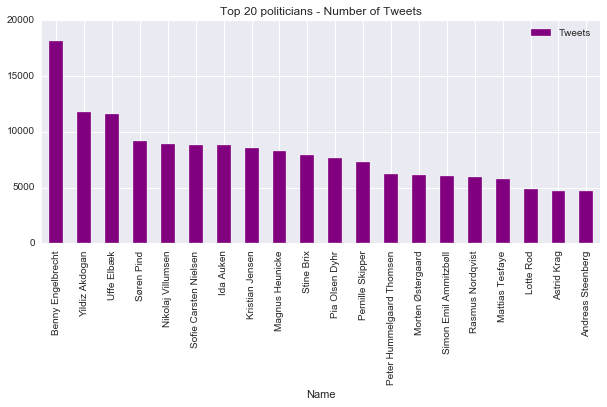

In [23]:
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
polSortedTweets = pol.sort_values('Tweets', ascending=False)
polSortedTweets[:20].plot('Name',['Tweets'], kind = 'bar',subplots = False, color = ['purple'], 
                    figsize = (10,4), edgecolor = 'white', title = 'Top 20 politicians - Number of Tweets')
plt.show()

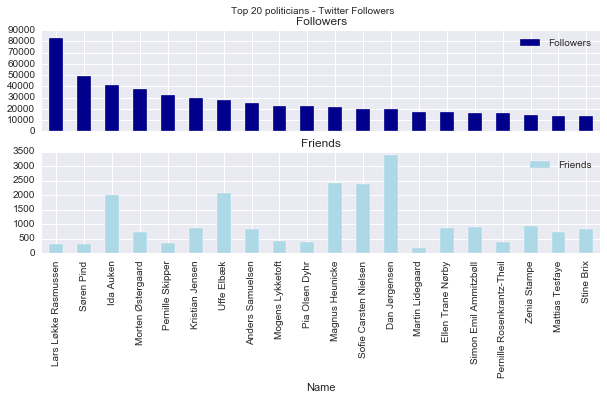

In [24]:
polSortedFol = pol.sort_values('Followers', ascending=False)
polSortedFol[:20].plot('Name',['Followers','Friends'], kind = 'bar',subplots = True, color = ['darkblue', 'lightblue'], 
                    figsize = (10,4), edgecolor = 'white', title = 'Top 20 politicians - Twitter Followers')
plt.show()

<a id="cell7"></a>

### 2.2.2 Parliament data
The parliament data contains almost 280.000 rows of speech from different politicians in the parliament through out the years since 2010 from 324 different politicians. Below are graphs showing the top 20 politicians according to who have talked most times in the parliament, how many times the politicians within the different parties have had 'talking-time'.

In [76]:
print 'Number of speech pieces in the data:', len(speech)

Number of speech pieces in the data: 273731


In [77]:
print 'Number of politicans:', len(speech.groupby('Speaker'))

Number of politicans: 324


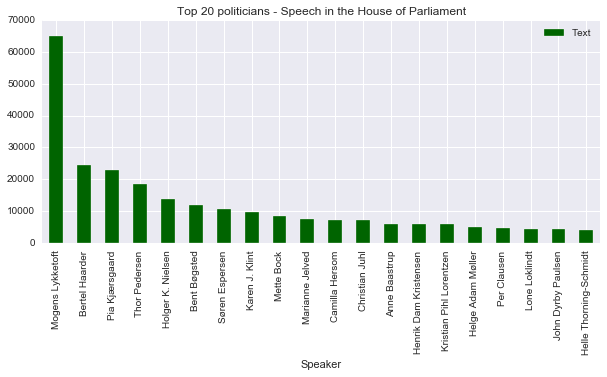

In [74]:
forPlot = speech[['Speaker', 'Text']].groupby('Speaker').count().reset_index().sort_values('Text', ascending=False)
forPlot[:20].plot('Speaker',['Text'], kind = 'bar',subplots = False, color = ['darkgreen'], 
                    figsize = (10,4), edgecolor = 'white', title = 'Top 20 politicians - Speech in the House of Parliament')
plt.show()

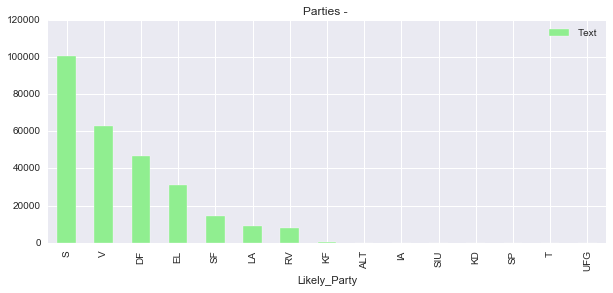

In [75]:
forPlot = speech[['Likely_Party', 'Text']].groupby('Likely_Party').count().reset_index().sort_values('Text', ascending=False)
forPlot[:20].plot('Likely_Party',['Text'], kind = 'bar',subplots = False, color = ['lightgreen'], 
                    figsize = (10,4), edgecolor = 'white', title = 'Parties - ')
plt.show()

<a id="cell8"></a>

# 3. Tools, theory and analysis

This section is the main part of this explainer notebook, and focuses on most of the analysis behind the cool stuff that is on the webpage. The section has been divided into Sentiment analysis, TF-IDF analysis and network analysis. The general the subsections include what we are interested in, how we got our results (including the tools we used) and the outcome of the analysis.

<a id="cell9"></a>

### 3.1 Sentiment analysis

In the sentiment analysis we are mostly interested to see if there is a difference between the sentiment of the politicians in the house of parliament vs. the sentiment on Twitter. We would also like to explore the sentiment over time to see if special events lead to extremas in the sentiment. 

#### 3.1.1 Calculation of sentiment

For sentiment calculations we have used the afinn list and the afinn implemented python package to calculate the sentiment. See a calculation example below. The sentiment have been calculated for each politician, an average sentiment score and a standard deviation score for both tweets from Twitter and speech pieces from the parliament meetings. 

The function afinn.score calculates a sentiment score for a tweet or speech piece as the sum of the sentiment scores for each word in the tweet/speech piece. This score have been used in the graph showing the sentiment over time on the webpage comparing Twitter sentiment with parliament sentiment. The parliament sentiments are in general higher because of the bias that longer speeches in the parliament creates using the afinn.score sentiment. 

However we also wanted to compare the politicians' average sentiment on Twitter with their average sentiment in the parliament. Therefore we decided to divide the score with the number of words - to even it out and make it possible to compare long speeches in the parliament with short tweets. We have then taken the average and the standard deviation of the scores for each tweet or speech piece belonging to each politician. The output can be seen in the dataframes below.

In [129]:
from afinn import Afinn
afinn = Afinn(language='da')
speech['Sentiment'] = [afinn.score(text) for text in speech['Text']]

In [132]:
dfAVG = pd.DataFrame.from_csv('SentAvgNew.csv')
dfSTD = pd.DataFrame.from_csv('SentStdNew.csv')

In [133]:
dfAVG.head()

,Twitter,Parliament
Thomas Danielsen,0.003851,0.005224
Peter Juel Jensen,0.010342,0.004659
Mattias Tesfaye,0.003754,0.006306
Karsten Lauritzen,0.005997,0.004730
Henrik Dahl,0.003370,-0.003270


In [134]:
dfSTD.head()

,Twitter,Parliament
Thomas Danielsen,0.024344,0.004245
Peter Juel Jensen,0.018999,0.005380
Mattias Tesfaye,0.021608,0.000000
Karsten Lauritzen,0.022098,0.018754
Henrik Dahl,0.025922,0.007916


<a id="cell9.1"></a>

#### 3.1.2 Outcome

The outcome of the comparison of politicians' sentiment on Twitter and in the parliament can be found below. The bar charts can also be found on the webpage, where only a subset of the politicians are included.

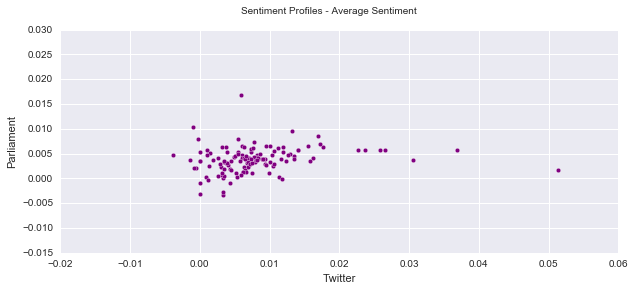

In [135]:
dfAVG.plot(0,1, kind = 'scatter',subplots = True, figsize = (10,4), color = 'purple',edgecolor = 'white', 
           title = 'Sentiment Profiles - Average Sentiment ')
plt.show()

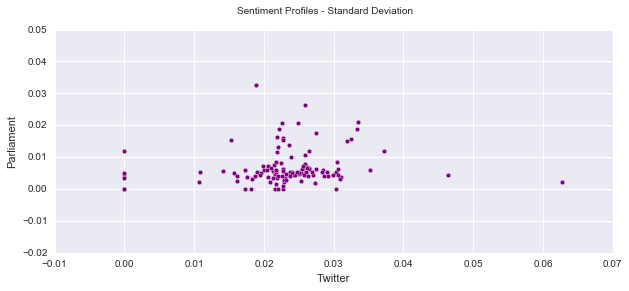

In [136]:
dfSTD.plot(0,1, kind = 'scatter',subplots = True, figsize = (10,4), color = 'purple',edgecolor = 'white', 
           title = 'Sentiment Profiles - Standard Deviation')
plt.show()

In [138]:
dfAVG = dfAVG.sort_index().reset_index()
dfSTD = dfSTD.sort_index().reset_index()

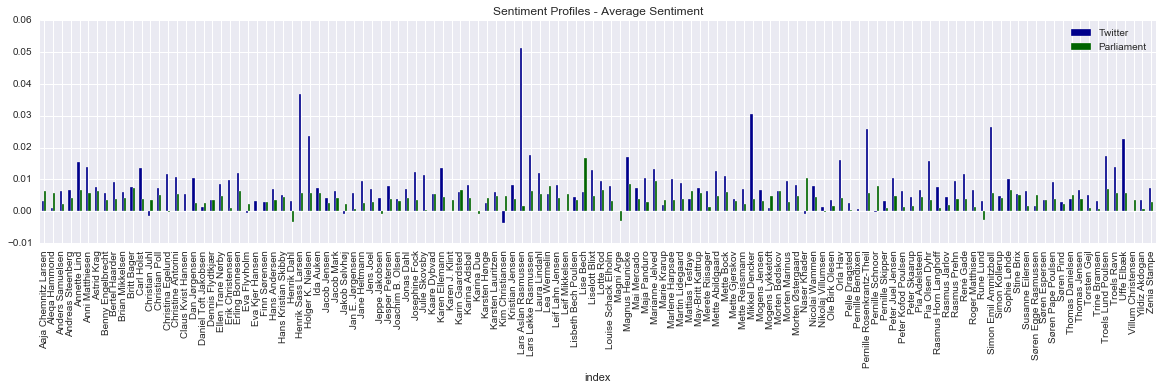

In [139]:
dfAVG.plot('index',['Twitter', 'Parliament'], kind = 'bar',subplots = False, color = ['darkblue', 'darkGreen'], 
         figsize = (20,4), edgecolor = 'white', title = 'Sentiment Profiles - Average Sentiment')
plt.show()

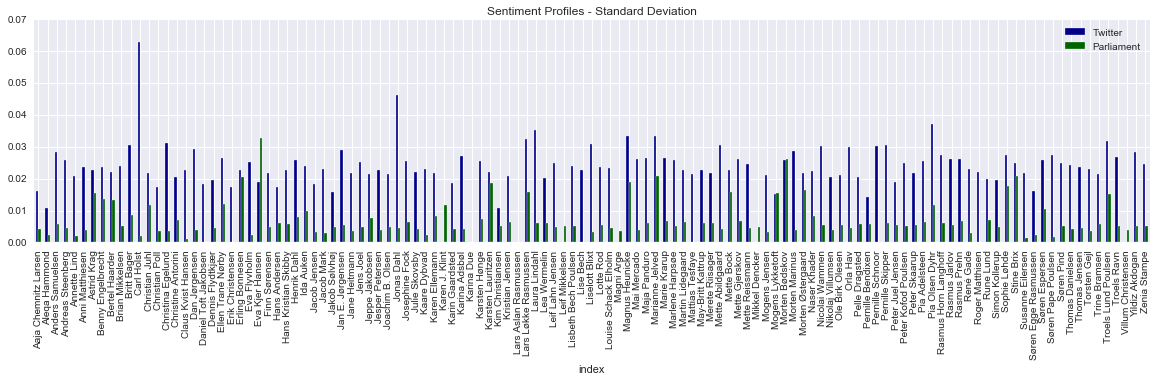

In [140]:
dfSTD.plot('index',['Twitter', 'Parliament'], kind = 'bar',subplots = False, color = ['darkBlue', 'darkGreen'], 
         figsize = (20,4), edgecolor = 'white', title = 'Sentiment Profiles - Standard Deviation')
plt.show()

<a id="cell10"></a>

### 3.2 TF-IDF analysis

In the TF-IDF analysis we want to see which words are most used in the parliament and on Twitter. Both within parties, but also the overall words over time. Will it be possible to see that in some periods the environment are in focus and in other periods it might be war or the school system. It could be interesting to see if clusters of the politicians calculated based on the words they have said or written with highest TF-IDF matches the actual parties.

#### 3.2.1 Calculation of TF-IDF
We have used the scikit learn library to calculate TF-IDF. This have been calculated within different time periods, overall and for the seperate politicians. All calculations for both Twitter and the parliament meetings. 

In [142]:
from sklearn.feature_extraction.text import (TfidfVectorizer,_document_frequency)
vectorizer = TfidfVectorizer(min_df=1)
tfidf  = vectorizer.fit_transform(agg_3m['Clean Text'])

We also calculated the cosine similarities for each party based on the TF-IDF. This was used to cluster the data. The clustering was done simply be using different build in scikit learn clusters. We tried DBSCAN, KMeans clustering and SpectralClustering. 

<a id="cell10.1"></a>

#### 3.2.2 Outcome
The outcome of this analysis is best represented on the webpage. 

First of all we created word clouds on a timeline. These word clouds are based on the TF-IDF of the words from either Twitter or the parliament meetings. Each word cloud covers a span of three months. Even though we used the TF-IDF scores that helps to adjust for the fact that some words are more frequent in all texts, we have also removed stop words. 
It turned out to work very well, and we actually see that the words represent what happened in that period of time. As an example we found clear 'ja' and 'nej' around the election. When Anders Fogh Rasmussen (former prime miniser of Denmark) became the Secretary General of NATO 'fogh' is big in the word cloud.

We have also created word clouds representing the different parties based on what the politicians from the party have written in tweets (one word cloud) or said in the parliament (another word cloud). This was mostly to understand if there are particular words or topics that are popular for each party. We found that most of them showed the same words, so they were not really exiting to include on the webpage.

The python word cloud package have been used to create the word clouds. Below is the word cloud representing the words with the highest TF-IDF for all the meetings in the parliament over time.

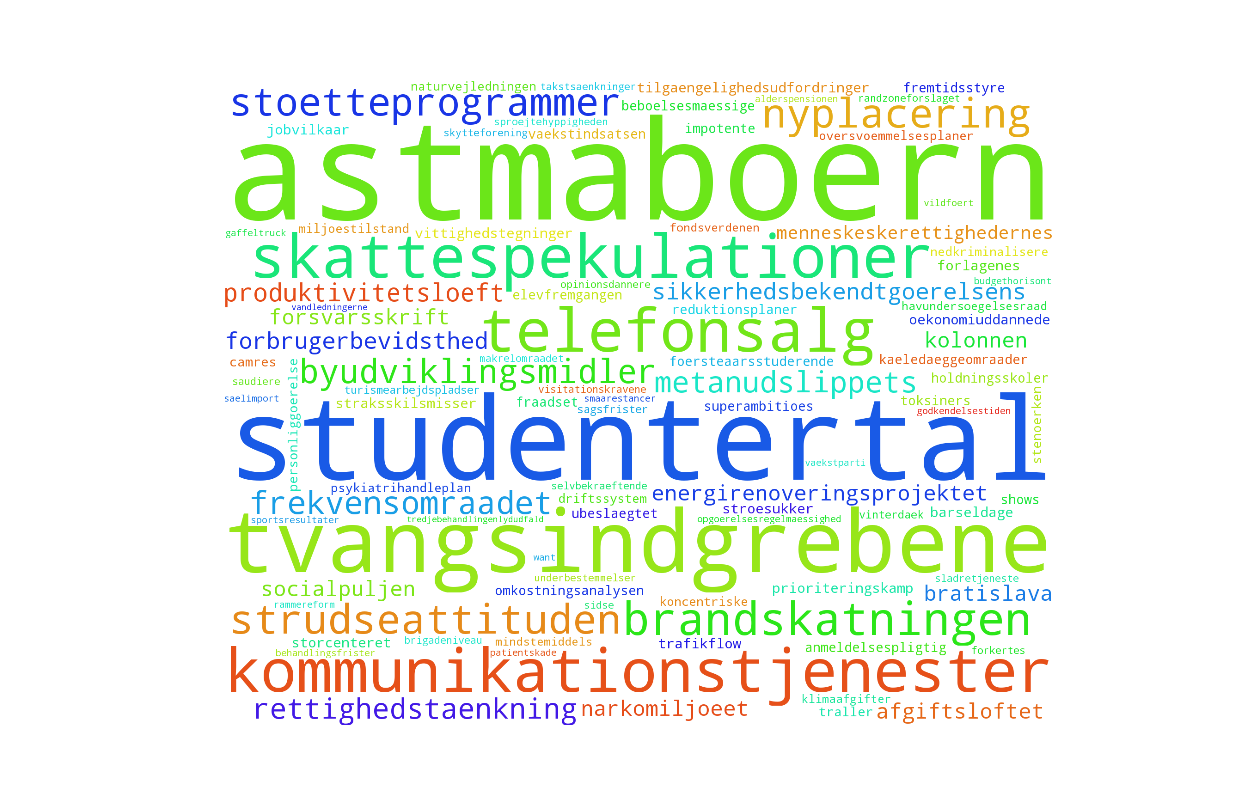

In [144]:
from IPython.display import Image
Image(filename='wordcloud-all.png') 

We looked at the similiarity of the TF-IDF words and found that the politicians from Greenland agree most with their own party. The graph below shows the top 10 politicians that are most similar to their parties. 

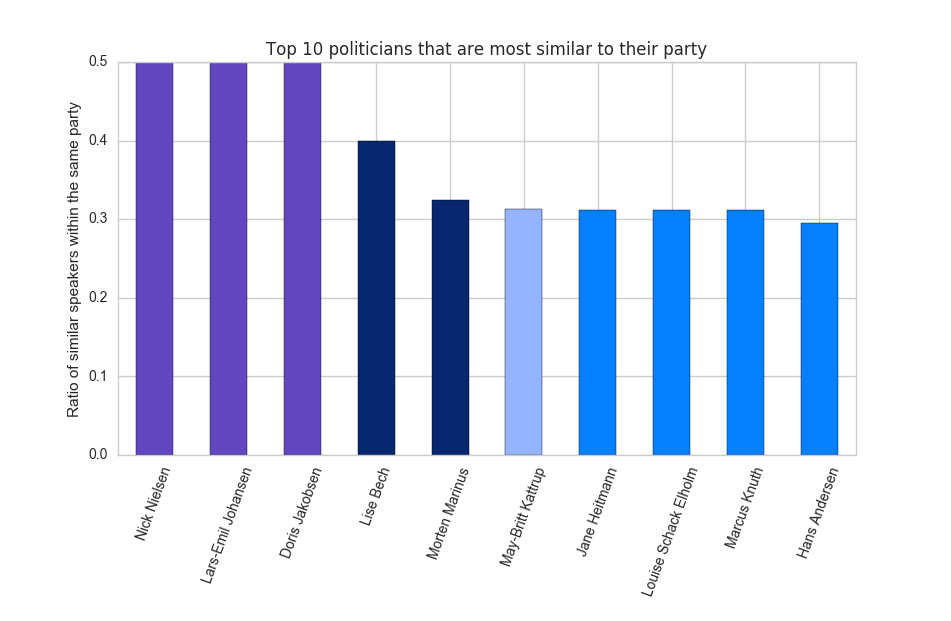

In [143]:
from IPython.display import Image
Image(filename='similarity_within_party.png') 

For clustering the outcome can be found on the webpage as well. We found that the two parties from Greenland ended in the same cluster for most of the clustering, whereas the other parties were mixed up. Below is an example of the SpectralClustering. 

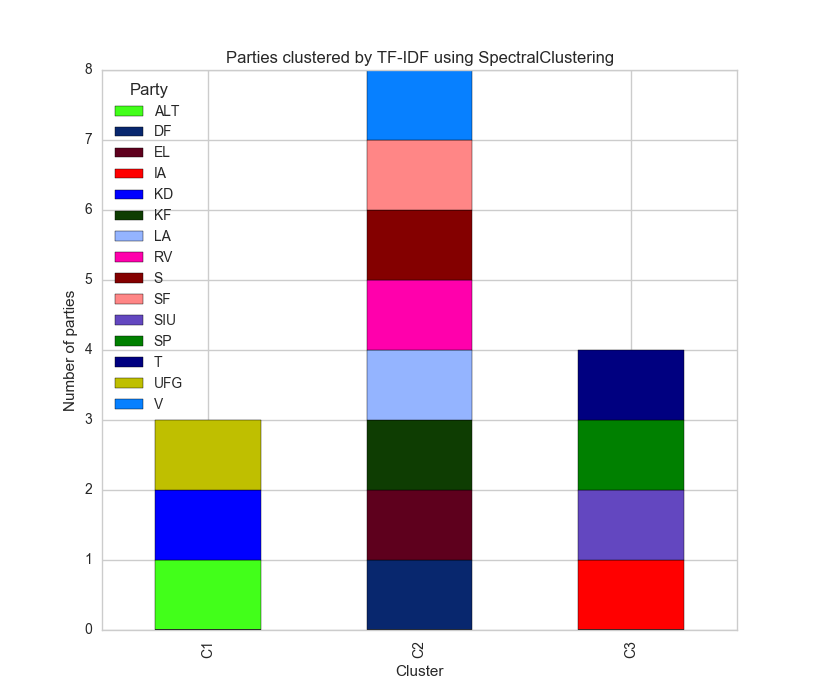

In [145]:
from IPython.display import Image
Image(filename='party_3_plots_spectral.png') 

As an example the picture above displays 3 clusters that the SpectralClustering found. The parties within the clusters are labeled with party names. We see that AI (Inuit Ataqatigiit) and T (Republikanerne) two parties from Greenland are in the same cluster.

<a id="cell12"></a>

### 3.3 Network analysis

In the project we have created two networks. One is the retweet network explaining how politicians have retweeted each other and the other network is based on the speech in the House of Parliament. How politicians at the meetings in the Parliament have mentioned each other. Through out this section we will present different network analysis for each of the networks.

#### Introduction to the Retweet network
The idea of creating a retweet network was to see if politicians mainly retweets other politicians within their own party and to discover some facts about the politicians retweet behavior. The sections below will take you through many of the network analysis we worked with in the course, and discuss the results we get when analysing the retweet network. 

The results have also been used on the webpage to create the interactive network. Here it is possible to change the color of the nodes either showing the detected communities by the Louvian algorithm or the actual parties that the politicians belong to. The node size at the network can be determined by the different measurements and centralities. Try it out on the website ;) 

The retweet graph is a directed graph having politicians as nodes linking to the different other politicians that the node has retweeted from. So if Lars Løkke Ramussen has retweeted Uffe Elbæk's tweet there will be a link from Lars Løkke Rasmussen to Uffe Elbæk. We also created a weighted graph, where each weight represented the number of times the source node had created a retweet from the target node. However we decided to work only with the unweighted graph. 

In [61]:
# We start by importing the graph
import networkx as nx
G = nx.read_gml('retweetGraph.gml')

You may wonder where that graph came from, but it is very simple (we will not bother you with the code for this). We opened all the json files and extended them to one large attribute called data. From data we created a dictionary looking only at retweets (starting with 'RT @name). The dictionary consists of politicians (as key) and all the people the politician has retweeted as value. Then we added the nodes and edges to the network and saved the graph.

<a id="cell12.1"></a>

#### Introduction to the Parliament network

We wanted to have a network representing the meetings in the Parliament as well. We generated this as a directed graph with politicians as nodes linking to the politicians they are mentioning within the meetings. We were a bit unsure whether we would get any relevant results, but we thought it was worth a try. 

The results for this graph are also presented on the webpage if you switch from the retweet graph.

We could not load the graph from a gml file because of unicode problems that we could not fix, so below the graph gets created.

In [85]:
# Getting the data frame with speech - it is called small because we have excluded speech pieces smaller than 15 char.
fullFrame = pd.DataFrame.from_csv('ft-texts-small.csv', encoding='utf-8')
speakerList = fullFrame.Speaker.unique()

In [86]:
# creating a dictionary with politicians as keys and the politicians they mention as values
polDict = {}
for i in fullFrame.values:
    text= i[1]#.decode('utf-8')
    curPolitician = i[0]#unicode(i[0],'utf-8')
    for speaker in speakerList:
        if speaker in text:
            if curPolitician not in polDict:
                polDict[curPolitician] = [speaker]
            else:
#               if speaker not in polDict[curPolitician]:
                polDict[curPolitician].append(speaker)

In [87]:
# Making the graph
GP = nx.DiGraph()
for i in polDict.iteritems():
    curPol = i[0]
    GP.add_node(curPol)
    for e in i[1]:
        if e in GP.neighbors(curPol):
            GP[curPol][e]['weight'] = GP[curPol][e]['weight']+1
            #print G[curPol][e]['weight']
        else:
            GP.add_edge(curPol,e, weight=1)

<a id="cell12.2"></a>

#### 3.3.3 Basic facts and degrees

In this section we focus on the basic facts about the network and the degrees of the nodes. Overall we have used the awesome Networkx library for python to create our network analysis. 

#### Retweet network

In [38]:
# Number of nodes and edges
print 'The total number nodes in the network is', len(G.nodes())
print 'The total number of links in the network is', len(G.edges())

# Average degree
allDegrees = 0
for i in G.nodes():
    allDegrees += G.degree(i) 
print 'The average degree is', (allDegrees+0.0)/(len(G.nodes())+0.0)

# Median degree
degreeDict = G.degree(G.nodes())
degrees = []
for k, v in degreeDict.iteritems():
    degrees.append(v)
degrees.sort()
print 'The median degree is', degrees[len(G.nodes())/2]

The total number nodes in the network is 137
The total number of links in the network is 2212
The average degree is 32.2919708029
The median degree is 30


In [59]:
import operator
import pprint as pp

# a function to convert twitter name to real name
def getName(twitterName):
    return pol[pol['NameShort'] == twitterName].index[0]
# a funtion that gets the party that the politician belongs to
def getParty(twitterName):
    return pol[pol['NameShort'] == twitterName]['Party'].values[0]

# Top 10 politicians by in-degree
inDegrees = G.in_degree(G.nodes())
inDegree = []
for k,v in inDegrees.iteritems():
    inDegree.append([v,getName(k), getParty(k)])
sortedIn = sorted(inDegree, reverse = True)

print 'Top 10 most retweeted politician by most other politicians:'
pp.pprint(sortedIn[:10])
print '\n'

# Top 10 politicians by out-degree
outDegrees = G.out_degree(G.nodes())
outDegree = []
for k,v in outDegrees.iteritems():
    outDegree.append([v,getName(k), getParty(k)])
sortedOut = sorted(outDegree, reverse = True)

print 'Top 10 politicians who have retweeted from most different other politicians:'
pp.pprint(sortedOut[:10])

Top 10 most retweeted politician by most other politicians:
[[54, 'Kristian Jensen', 'Venstre'],
 [54, 'Benny Engelbrecht', 'Socialdemokraterne'],
 [51, 'Magnus Heunicke', 'Socialdemokraterne'],
 [45, 'Morten B\xc3\xb8dskov', 'Socialdemokraterne'],
 [44, 'S\xc3\xb8ren Pind', 'Venstre'],
 [41, 'Pia Olsen Dyhr', 'SF'],
 [40, 'Mattias Tesfaye', 'Socialdemokraterne'],
 [37, 'Ida Auken', 'Radikale'],
 [36, 'Morten \xc3\x98stergaard', 'Radikale'],
 [36, 'Mette Gjerskov', 'Socialdemokraterne']]


Top 10 politicians who have retweeted from most different other politicians:
[[49, 'Ane Halsboe-J\xc3\xb8rgensen', 'Socialdemokraterne'],
 [44, 'Ellen Trane N\xc3\xb8rby', 'Venstre'],
 [42, 'Liselott Blixt', 'Dansk Folkeparti'],
 [41, 'Trine Bramsen', 'Socialdemokraterne'],
 [41, 'Jens Joel', 'Socialdemokraterne'],
 [40, 'Morten Marinus', 'Dansk Folkeparti'],
 [40, 'Mette Reissmann', 'Socialdemokraterne'],
 [40, 'Mattias Tesfaye', 'Socialdemokraterne'],
 [37, 'Christine Antorini', 'Socialdemokraterne

We see that Kristian Jensen is the politician that have been retweeted by most other politicians, and Ane Halsboe-Jørgensen is the politician who have retweeted from most different other politicians. In general Socialdemokraterne are well represented in both lists. 

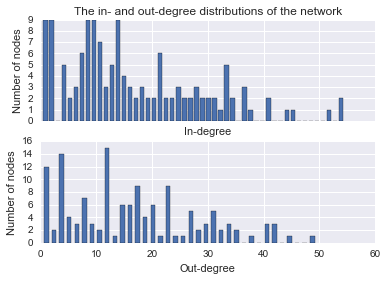

In [23]:
# Degree distributions
import numpy as np
import seaborn
import matplotlib.pyplot as plt
% matplotlib inline

# In-degree - making ready for plot
inDegreeInt = []
for i in inDegree:
    inDegreeInt.append(i[0])

yIn, xIn = np.histogram(inDegreeInt, bins = 50)
newXIn = []
for i in range(len(xIn)-1):
    val = (xIn[i]+xIn[i+1])/2
    newXIn.append(val)
    
# Out-degree - making ready for plot
outDegreeInt = []
for i in outDegree:
    outDegreeInt.append(i[0])

yOut, xOut = np.histogram(outDegreeInt, bins = 36)
newXOut = []
for i in range(len(xOut)-1):
    val = (xOut[i]+xOut[i+1])/2
    newXOut.append(val)

# Plotting
f, (ax1, ax2) = plt.subplots(2, sharex = True)

ax1.bar(newXIn,yIn)
ax1.set_title('The in- and out-degree distributions of the network')
ax1.set_xlabel('In-degree')
ax1.set_ylabel('Number of nodes')
    
ax2.bar(newXOut,yOut)
ax2.set_xlabel('Out-degree')
ax2.set_ylabel('Number of nodes')
plt.show()

For either the in-degree or out-degree we do not see a typical degree distribution like poission or power low. There is a small tendency that the distributions are right-screwed meaning that most nodes have low in- and out-degree, and then fewer have high in- and out-degree. This is like a social media network or the Internet that normally have a power low distribution where most people do not have that many connections and few people are 'hubs' and have a lot.

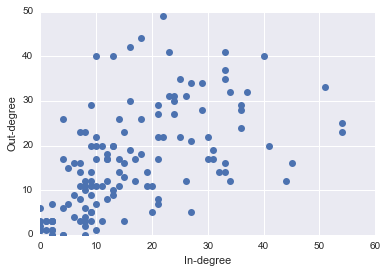

In [60]:
# Plotting the in-degrees vs. the out-degrees
plt.plot(inDegreeInt, outDegreeInt, 'o', markeredgecolor='none')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')
plt.show()

If we plot the in-degree vs. out-degree there is a slight tendency towards a linear correlation meaning that politicians who retweet a lot of different other politicians (out-degree) also have a tendency to get retweeted from by more other politicians (in-degree), and if they are not super active they do not get retweeted that much either. 

<a id="cell12.3"></a>

#### Parliament network

In [65]:
# Number of nodes and edges
print 'The total number nodes in the network is', len(GP.nodes())
print 'The total number of links in the network is', len(GP.edges())

# Average degree
allDegrees = 0
for i in GP.nodes():
    allDegrees += GP.degree(i) 
print 'The average degree is', (allDegrees+0.0)/(len(GP.nodes())+0.0)

# Median degree
degreeDict = GP.degree(GP.nodes())
degrees = []
for k, v in degreeDict.iteritems():
    degrees.append(v)
degrees.sort()
print 'The median degree is', degrees[len(GP.nodes())/2]

The total number nodes in the network is 324
The total number of links in the network is 6852
The average degree is 42.2962962963
The median degree is 25


In [92]:
def getPartyParl(name):
    return fullFrame[fullFrame['Speaker'] == name]['Likely_Party'].values[0]

# Top 10 politicians by in-degree
inDegrees = GP.in_degree(GP.nodes())
inDegree = []
for k,v in inDegrees.iteritems():
    inDegree.append([v,k, getPartyParl(k)])
sortedIn = sorted(inDegree, reverse = True)

print 'Top 10 most mentioned politicians by other polticians:'
pp.pprint(sortedIn[:10])
print '\n'

# Top 10 politicians by out-degree
outDegrees = GP.out_degree(GP.nodes())
outDegree = []
for k,v in outDegrees.iteritems():
    outDegree.append([v,k, getPartyParl(k)])
sortedOut = sorted(outDegree, reverse = True)

print 'Top 10 politicians who have mentioned most other politicians:'
pp.pprint(sortedOut[:10])

Top 10 most mentioned politicians by other polticians:
[[65, u'Simon Emil Ammitzb\xf8ll', u'LA'],
 [63, u'Per Clausen', u'EL'],
 [51, u'Finn S\xf8rensen', u'EL'],
 [50, u'Frank Aaen', u'EL'],
 [49, u'Pernille Skipper', u'EL'],
 [46, u'Martin Henriksen', u'DF'],
 [46, u'Lars L\xf8kke Rasmussen', u'V'],
 [46, u'Johanne Schmidt-Nielsen', u'EL'],
 [45, u'Jonas Dahl', u'SF'],
 [45, u'Henning Hyllested', u'EL']]


Top 10 politicians who have mentioned most other politicians:
[[314, u'Mogens Lykketoft', u'S'],
 [268, u'Pia Kj\xe6rsgaard', u'DF'],
 [266, u'Bent B\xf8gsted', u'DF'],
 [256, u'Karen J. Klint', u'EL'],
 [247, u'Thor Pedersen', u'S'],
 [240, u'Bertel Haarder', u'V'],
 [239, u'Holger K. Nielsen', u'SF'],
 [229, u'S\xf8ren Espersen', u'DF'],
 [201, u'Mette Bock', u'LA'],
 [196, u'Camilla Hersom', u'V']]


We see that 6 of the politicians who have been mentioned by most different people are from Enhedslisten. Three politicians from Dansk Folkeparti are in the top 10 for politicians who have mentioned most different people. Mogens Lykketoft is on a sumblime 1st place for that, but he have also been 'Formand' for the meetings and part of the Parliament for many years.

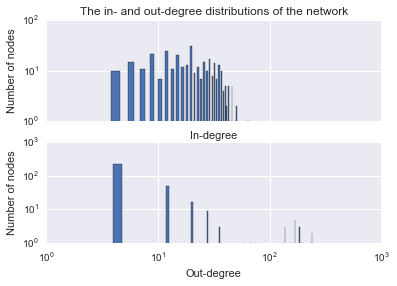

In [98]:
# Degree distributions
# In-degree - making ready for plot
inDegreeInt = []
for i in inDegree:
    inDegreeInt.append(i[0])

yIn, xIn = np.histogram(inDegreeInt, bins = 40)
newXIn = []
for i in range(len(xIn)-1):
    val = (xIn[i]+xIn[i+1])/2
    newXIn.append(val)
    
# Out-degree - making ready for plot
outDegreeInt = []
for i in outDegree:
    outDegreeInt.append(i[0])

yOut, xOut = np.histogram(outDegreeInt, bins = 40)
newXOut = []
for i in range(len(xOut)-1):
    val = (xOut[i]+xOut[i+1])/2
    newXOut.append(val)

# Plotting
f, (ax1, ax2) = plt.subplots(2, sharex = True)

ax1.bar(newXIn,yIn)
ax1.set_title('The in- and out-degree distributions of the network')
ax1.set_xlabel('In-degree')
ax1.set_ylabel('Number of nodes')
ax1.set_yscale('log')
ax1.set_xscale('log')
    
ax2.bar(newXOut,yOut)
ax2.set_xlabel('Out-degree')
ax2.set_ylabel('Number of nodes')
ax2.set_yscale('log')
ax2.set_xscale('log')
plt.show()

The out-degree distribution have a tendency of a power law distribution having few politicians who are 'hubs', who mentions a lot of other different politicians in the meetings. 

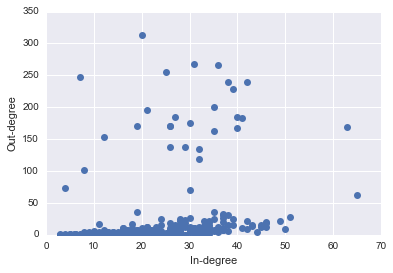

In [99]:
# Plotting the in-degrees vs. the out-degrees
ax = plt.gca()
ax.plot(inDegreeInt, outDegreeInt, 'o', markeredgecolor='none')
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.xlabel('In-degree')
plt.ylabel('Out-degree')

We see a tendency that not that many politicians have been mentioned by many different other politicians, but we do have some politicians who have mentioned a lot of other politicians. This most likely includes Chairmen of the Parliament throughout the years. 

<a id="cell12.4"></a>

#### 3.3.4 Centralities

In this section we calculate centralities and comment on the results.

#### Retweet network

In [105]:
# First we use the betweenness centrality function and then find the 5 with highest betweenness centrality by sorting the dict
betDict = nx.betweenness_centrality(G)
print 'The 5 most central politicians according to betweenness centrality'
new = list(sorted(betDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getParty(i[0]), getName(i[0])

 The 5 most central politicians according to betweenness centrality
(u'skaarup_df', 0.07372488837135087) Dansk Folkeparti Peter Skaarup
(u'mattiastesfaye', 0.052346042180942916) Socialdemokraterne Mattias Tesfaye
(u'Kristian_Jensen', 0.051217998944952936) Venstre Kristian Jensen
(u'Trinebramsen', 0.041423686815045074) Socialdemokraterne Trine Bramsen
(u'Blixt22', 0.03472894820190337) Dansk Folkeparti Liselott Blixt


Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. - Wikipedia

These 5 politicians with the highest betweeenness centrality can be interpreted as wanting to go from one politician to another based on who have retweeted who taking the shortest path you would most often pass through this top 5. They are central in the network which is also seen by Kristian Jensen being the most retweeted person (by most different other politicians), and Trine Bramsen being in top 10 of the politicians who have retweeted most other different politicians' tweets.

In [106]:
# We use the eigenvector centrality function on both in- and out-edges
# In-edges
evcIn = nx.eigenvector_centrality(G)
print 'The 5 most central politicians according to eigenvector centrality (in-degree)'
new = list(sorted(evcIn.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getParty(i[0]), getName(i[0])
# Out-edges
revG = G.reverse()
evcOut = nx.eigenvector_centrality(revG)
print '\n The 5 most central politicians according to eigenvector centrality (out-degree)'
new = list(sorted(evcOut.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getParty(i[0]), getName(i[0])

The 5 most central politicians according to eigenvector centrality (in-degree)
(u'BennyEngelbrech', 0.25219907058196517) Socialdemokraterne Benny Engelbrecht
(u'Heunicke', 0.2375928411752265) Socialdemokraterne Magnus Heunicke
(u'mfMorten', 0.21765465607377457) Socialdemokraterne Morten Bødskov
(u'Kristian_Jensen', 0.20181191693447215) Venstre Kristian Jensen
(u'Jesper_Pet', 0.18969267185871164) Socialdemokraterne Jesper Petersen

 The 5 most central politicians according to eigenvector centrality (out-degree)
(u'AneHalsboe', 0.22104429930110392) Socialdemokraterne Ane Halsboe-Jørgensen
(u'Jens_Joel', 0.20643725621590295) Socialdemokraterne Jens Joel
(u'mettereissmann', 0.20505860385173066) Socialdemokraterne Mette Reissmann
(u'mattiastesfaye', 0.19539607692586108) Socialdemokraterne Mattias Tesfaye
(u'Trinebramsen', 0.18966095201479943) Socialdemokraterne Trine Bramsen


Eigenvector centrality assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. - Wikipedia

The politicians in the top 5's have retweeted or been retweeted by connecting nodes that have high scores as well. They often correspond to the top 5 in-degree and out-degree, which is also the case here for in-degree where we see the top 4 also being represented in the top 10 according to in-degree. The reason is that eigenvector centrality is similar to degree centrality except from the fact that eigenvector centrality calculations include the relative scores. For out-degree we see the entire top 5 also being represented in the top 10 out-degree. 

It is interesting to see how it is only Socialdemokrater included in the top 5 for out-degree, and almost only them for the top 5 in-degree. They have a tendency to retweet mainly other politicians that retweet a lot of different other politicians. 

Benne Engelbrech is the politician who have tweeted the most (as we saw in the data exploration section). He is very active on Twitter, which also makes him likely to be very connected.

<a id="cell12.5"></a>

#### Parliament network

In [107]:
# First we use the betweenness centrality function and then find the 5 with highest betweenness centrality by sorting the dict
betDict = nx.betweenness_centrality(GP)
print 'The 5 most central politicians according to betweenness centrality'
new = list(sorted(betDict.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getPartyParl(i[0])

The 5 most central politicians according to betweenness centrality
(u'Per Clausen', 0.07906688318255085) EL
(u'Holger K. Nielsen', 0.04937834195061093) SF
(u'Pia Kj\xe6rsgaard', 0.04752040347793335) DF
(u'Bent B\xf8gsted', 0.04586942786813836) DF
(u'Bertel Haarder', 0.04472353862907417) V


In [109]:
# We use the eigenvector centrality function on both in- and out-edges
# In-edges
evcIn = nx.eigenvector_centrality(GP)
print 'The 5 most central politicians according to eigenvector centrality (in-degree)'
new = list(sorted(evcIn.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getPartyParl(i[0])
# Out-edges
revGP = GP.reverse()
evcOut = nx.eigenvector_centrality(revGP)
print '\n The 5 most central politicians according to eigenvector centrality (out-degree)'
new = list(sorted(evcOut.iteritems(), key=operator.itemgetter(1), reverse=True)[:5])
for i in new:
    print i, getPartyParl(i[0])

 The 5 most central politicians according to eigenvector centrality (in-degree)
(u'Finn S\xf8rensen', 0.2747714871815404) EL
(u'Ole Birk Olesen', 0.19586057004421806) LA
(u'Simon Emil Ammitzb\xf8ll', 0.19320916062080268) LA
(u'Per Clausen', 0.181175921416492) EL
(u'Christian Juhl', 0.17723153543208195) EL

 The 5 most central politicians according to eigenvector centrality (out-degree)
(u'Mogens Lykketoft', 0.771361251232628) S
(u'Thor Pedersen', 0.3877402528038882) S
(u'Bertel Haarder', 0.2864693506792227) V
(u'Pia Kj\xe6rsgaard', 0.22288376930131074) DF
(u'Holger K. Nielsen', 0.14494424813373577) SF


<a id="cell12.6"></a>

#### 3.3.5 Community detection

And now to the interesting part - discovering the communities of the network. 

#### Retweet network
We would expect that politicians mostly retweet within their own party, and the communities detected actually shows that we are right. Take a look at following cells.

In [28]:
import community

# Making the full graph undirected
G_undirected = G.to_undirected()

# Using the community package to calculate the modularity via partitioning
partition = community.best_partition(G_undirected)
print 'The modularity of the network is:', community.modularity(partition, G_undirected)

The modularity of the network is: 0.334759702172


A modularity of 0.33 is higher than 0, so the algorithm does detect communities. The higher the modularity is the better the partition is, meaning that if the modularity is high the corresponding community structure is good. A modularity of 0.33 is good in this case, and below we'll show why when checking how the partitions match the actual parties using a confusion matrix.

In [29]:
# Making a dictionary that has partition group as key and the nodes within the group as value
commDict = {}
for key, value in partition.iteritems():
    if value not in commDict:
        commDict[value] = [key]
    else:
        commDict[value].append(key)

In [33]:
# Making a dictionary that has party as key and politicians within the party as value
partyDict = {}
for index, val in pol.iterrows():
    name = val[2]
    party = val[3]
    if party not in partyDict:
        partyDict[party] = [name]
    else:
        partyDict[party].append(name)

In [34]:
# Making a confusion matrix to compare how well the louvian algorithm divided clusters match the actual parties
matrixD = {}
for keyP, valueP in partyDict.iteritems():
    matrixD[keyP] = []
    for keyC, valueC in commDict.iteritems():
        counter = 0
        for i in valueP:
            for j in valueC:
                if i == j:
                    counter += 1
        matrixD[keyP].append(counter)

for key, value in matrixD.iteritems():
    print value, key

[0, 0, 0, 0, 0] Siumut
[0, 6, 0, 0, 0] Konservative
[0, 0, 0, 11, 0] Enhedslisten
[0, 0, 0, 9, 0] Alternativet
[0, 1, 24, 0, 0] Venstre
[0, 6, 0, 0, 2] Radikale
[0, 0, 0, 1, 0] Inuit Ataqatigiit
[0, 0, 0, 1, 37] Socialdemokraterne
[0, 0, 0, 0, 0] Republikanerne
[0, 0, 10, 0, 0] Liberal Alliance
[22, 0, 0, 0, 0] Dansk Folkeparti
[0, 0, 0, 7, 0] SF


The confusion matrix shows that the communities detected by the louvian algorithm matches parties very well. As an example we see that 22 politicians have been added to one community and it happens that all these 22 politicians are from Dansk Folkeparti. We can conclude that they mainly retweet tweets posted by they follow party-members, which also makes really good sense. 

Since there are only detected 5 different communities some parties are represented by the same community. Here we see that Liberal Alliance and Venstre are in the same community and Enhedslisten, SF and Alternativet are in the same as well. We can interpret as when politicians retweet other politicians from other parties they are most likely to retweet someone from a party in the same block. Radikale seems to have gotten their own community, but they are also in the middle of the two blocks.

Remember to explore the graph on the website instead of just looking at this plain confusion matrix.

<a id="cell12.7"></a>

#### Parliament network

In [75]:
import community

# Making the full graph undirected
GP_undirected = GP.to_undirected()

# Using the community package to calculate the modularity via partitioning
partition = community.best_partition(GP_undirected)
print 'The modularity of the network is:', community.modularity(partition, GP_undirected)

The modularity of the network is: 0.176823066348


The modularity for the parliament community is very low, indicating that there is not a strong community structure in the network. 

In [76]:
# Making a dictionary that has partition group as key and the nodes within the group as value
commDict = {}
for key, value in partition.iteritems():
    if value not in commDict:
        commDict[value] = [key]
    else:
        commDict[value].append(key)

In [77]:
# Making a dictionary that has party as key and politicians within the party as value
partyDict = {}
for index, val in fullFrame.iterrows():
    name = val[0]
    party = val[2]
    if party not in partyDict:
        partyDict[party] = [name]
    else:
        partyDict[party].append(name)

In [78]:
# Making a confusion matrix to compare how well the louvian algorithm divided clusters match the actual parties
matrixD = {}
for keyP, valueP in partyDict.iteritems():
    matrixD[keyP] = []
    for keyC, valueC in commDict.iteritems():
        counter = 0
        for i in valueP:
            for j in valueC:
                if i == j:
                    counter += 1
        matrixD[keyP].append(counter)

for key, value in matrixD.iteritems():
    print value, key

[197, 3213, 16997] EL
[5270, 311, 157] RV
[389, 48, 67] KF
[9, 1, 5] SIU
[342, 1, 5948] LA
[7968, 6325, 15981] DF
[9, 0, 0] SP
[0, 6, 0] UFG
[42587, 18325, 5102] S
[0, 10, 0] KD
[0, 2, 4] T
[34894, 647, 6032] V
[13, 1, 7] IA
[0, 0, 89] ALT
[185, 8416, 165] SF


We see that the louvian algorithm only divides the network into 3 communities, which is few. In this case it is very difficult to force parties over the communities. But this also makes sense because in the parliament all the politicians talk to each other. Most likely politicians talk to other politicians from other parties than from their own. Hopefully they have already discussed the party's interests within the party before the meetings, and do not have much reason to talk to eachother at the parliament meeting.

<a id="cell13"></a>

# 4. Discussion

Overall we think we have created a really nice webpage that creates value for the user looking at it. It have some really cool analysis and visualizations. This both includes word clouds, the interactive network and the nice sentiment analysis plot showing the sentiment over time including special events as well. 
We also had a lot of fun exploring the data and we tried a lot of different things on the data. This lead to the part that did not went very well, that we did not save enough time finish the explainer notebook and get everything we wanted on the webpage.

We did not have time to include a proper work through of the sentiment and tf-idf analysis in the explainer notebook. At the same time we did not set enough time to go through the final details, but overall we are satisfied with the webpage we have created. The explainer notebook could definitely be improved by including more detailed information about the TF-IDF analysis and clustering that we have done. 

We could keep on working with this project for many weeks, even months finding new ways to analyze the data. Future work would be to implement the clustering analysis mainly on the webpage, and maybe try to find a way to improve the clustering algorithms, or use other algoritms instead.